In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

import isolation_env
from bots import RandomBot, HeuristicBot, MCTSBot, MCTSBiggerBot

BOARD_SIZE = (6,8)

def run_one_game(bots, env):

    for agent in env.agent_iter():
        id = ['player_0', 'player_1'].index(agent)

        observation, reward, termination, truncation, info = env.last()
        
        if termination or truncation:
            bots[id].learn(observation, reward)
            action = None

            if reward == 1:
                winner = agent

        else:
            action = bots[id].take_step(observation)

        env.step(action)
    
    return winner

ImportError: cannot import name 'MCTSBiggerBot' from 'bots' (c:\Users\weisy\Documents\My Files\+Harvard+\07 2024 Fall\CS 184 Reinforcement Learning\Project\CSstat184FinalProject\bots.py)

In [14]:
def run_games(bots, num_games):
    print("Starting run_games")
    env = isolation_env.env(board_size=BOARD_SIZE, render_mode=None)
    env.reset()

    batch_win_rates = []
    batch_wins = 0
    batch_size = 100
    print("Each Batch contains {} games".format(batch_size))

    for i in range(num_games):
        winner = run_one_game(bots, env)
        env.reset()
        
        if winner == "player_0":
            batch_wins += 1

        if i % batch_size == batch_size - 1:
            batch = i // batch_size
            batch_win_rate = batch_wins / batch_size

            # now = datetime.datetime.now()
            # timestamp = now.strftime("%H:%M:%S")

            # print("{} Batch {} Win Percentage: {:.0%}".format(timestamp, batch, batch_win_rate))
            batch_win_rates.append(batch_win_rate)
            batch_wins = 0

    env.close()
    return batch_win_rates

In [15]:
mcts_star_data = []

In [16]:
for _ in range(25):
    bots = [MCTSBot(board_size=BOARD_SIZE), HeuristicBot(board_size=BOARD_SIZE)]
    mcts_star_data.append(run_games(bots, 30000))
    print(bots[0].STATS_MOVE_VISITED)
    print(bots[0].STATS_MOVE_WON)
    print(bots[0].STATS_REMOVE_VISITED)
    print(bots[0].STATS_REMOVE_WON)

Starting run_games
Each Batch contains 100 games
{(0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1): 142, (0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1): 169, (0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1): 90, (0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1): 1, (0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0): 465, (0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1): 30, (0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1): 85, (0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1): 28, (0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0): 315, (0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1): 1, (0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1): 34, (0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1): 31, (1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1): 504, (0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1): 83, (0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1): 1089, (0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1): 830, (0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0): 1451, (0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1): 1806, (0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1): 21, (0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0): 108, (0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1): 6, (0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1): 157, (0, 0, 0, 1, 1,

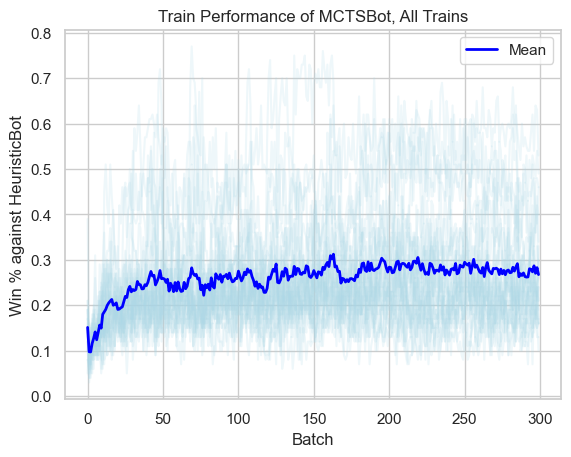

In [39]:
# Full set
sns.set(style="whitegrid")

data_array = np.array(mcts_star_data)
mean = np.mean(data_array, axis=0)
pct_25 = np.quantile(data_array, 0.25, axis=0)
pct_75 = np.quantile(data_array, 0.75, axis=0)

for l in data_array:
    plt.plot(l, color='lightblue', alpha=0.2)

# plt.plot(pct_25, color='lightblue')
# plt.plot(pct_75, color='lightblue')
plt.plot(mean, color='blue', linewidth=2, label='Mean')

# Add labels and legend
plt.xlabel('Batch')
plt.ylabel('Win % against HeuristicBot')
plt.title('Train Performance of MCTSBot, All Trains')
plt.legend()

# Show the plot
plt.show()

In [33]:
from scipy.stats import pearsonr

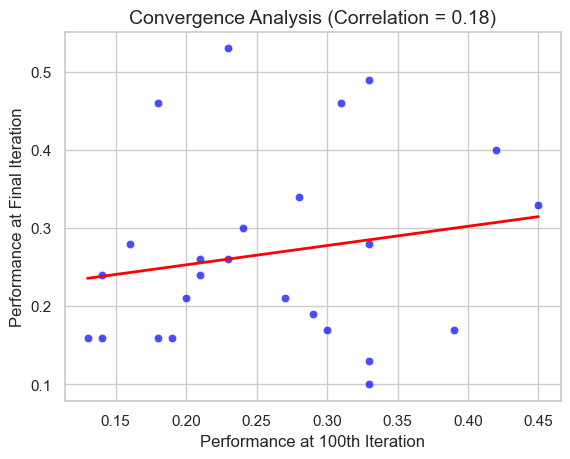

In [35]:
# Extract iterations
iteration_100 = data_array[:, 99]
iteration_300 = data_array[:, 299]

correlation, p_value = pearsonr(iteration_100, iteration_300)
sns.scatterplot(x=iteration_100, y=iteration_300, color='blue', alpha=0.7)

sns.regplot(x=iteration_100, y=iteration_300, scatter=False, color='red', ci=None, line_kws={"linewidth": 2})
plt.xlabel('Performance at 100th Iteration')
plt.ylabel('Performance at Final Iteration')
plt.title(f'Convergence Analysis (Correlation = {correlation:.2f})', fontsize=14)

# Show the plot
plt.show()


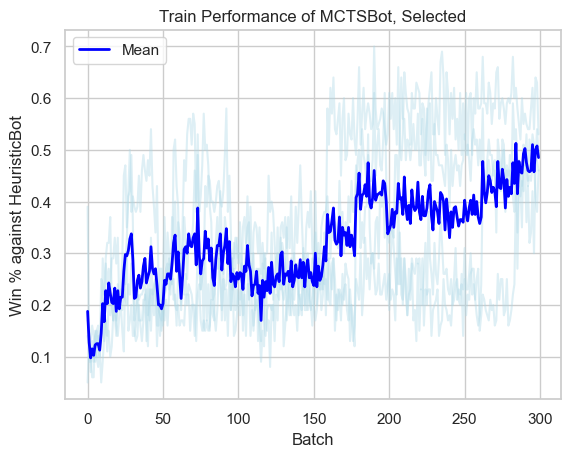

In [45]:
cutoff = 0.4

mcts_subselect = np.array([l for l in mcts_star_data if l[-1] > cutoff])
cutoff_mean = np.mean(mcts_subselect, axis=0)
pct_25 = np.quantile(mcts_subselect, 0.25, axis=0)
pct_75 = np.quantile(mcts_subselect, 0.75, axis=0)

# Plot each list as a light blue transparent line
for lst in mcts_subselect:
    plt.plot(lst, color='lightblue', alpha=0.4)

# Plot the mean as a solid blue line
# plt.plot(pct_25, color='lightblue')
# plt.plot(pct_75, color='lightblue')
plt.plot(cutoff_mean, color='blue', linewidth=2, label='Mean')

# Add labels and legend
plt.xlabel('Batch')
plt.ylabel('Win % against HeuristicBot')
plt.title('Train Performance of MCTSBot, Selected')
plt.legend()

# Show the plot
plt.show()

In [30]:
import seaborn as sns

In [52]:
# Test
trained_bots = []


In [ ]:
b = MCTSBot(board_size=BOARD_SIZE)
b.STATS_MOVE_VISITED = 
b.STATS_MOVE_WON = 
b.STATS_REMOVE_VISITED = 
b.STATS_REMOVE_WON = 
trained_bots.append(b)
len(trained_bots)

In [79]:
len(trained_bots)

25

In [80]:
# Exploit test
def test_one_game(bots, env):

    for agent in env.agent_iter():
        id = ['player_0', 'player_1'].index(agent)

        observation, reward, termination, truncation, info = env.last()
        
        if termination or truncation:
            # bots[id].learn(observation, reward)
            action = None

            if reward == 1:
                winner = agent

        else:
            action = bots[id].take_step(observation)

        env.step(action)
    
    return winner

def test_games(bots, num_games):
    env = isolation_env.env(board_size=BOARD_SIZE, render_mode=None)
    env.reset()

    wins = 0

    for i in range(num_games):
        winner = test_one_game(bots, env)
        env.reset()
        
        if winner == "player_0":
            wins += 1

    env.close()
    return wins / num_games

In [81]:
rb = RandomBot()
hb = HeuristicBot(board_size=BOARD_SIZE)

wins_random = []
wins_heuristic = []

for b in trained_bots:
    b.exploration_weight = 0

    wins_random.append(test_games([b, rb], 1000))
    wins_heuristic.append(test_games([b, hb], 1000))

KeyboardInterrupt: 

In [82]:
import multiprocessing

def run_tests(b, rb, hb):
    b.exploration_weight = 0
    return (test_games([b, rb], 1000), test_games([b, hb], 1000))

rb = RandomBot()
hb = HeuristicBot(board_size=BOARD_SIZE)

with multiprocessing.Pool() as pool:
    results = pool.starmap(run_tests, [(b, rb, hb) for b in trained_bots])

wins_random, wins_heuristic = zip(*results)

: 

: 

In [ ]:
results

In [ ]:
# Compare to training performance, last 100 batches (100 games each)
train_last_100 = np.mean(data_array[:, -100], axis=0)
assert(len(train_last_100) == len(wins_random))

sns.scatterplot(x=train_last_100, y=wins_heuristic, color='blue')
sns.scatterplot(x=train_last_100, y=wins_random, color='red')